# CF-1.6 (iris)

There are many Python libraries to read and write CF metdata, but only one module that encapsulates CF in an object with an API: [`iris`](http://scitools.org.uk/iris/).

    Iris seeks to provide a powerful, easy to use, and community-driven Python library for analysing and visualising meteorological and oceanographic data sets.

    With iris you can:

    - Use a single API to work on your data, irrespective of its original format.
    - Read and write (CF-)netCDF, GRIB, and PP files.
    - Easily produce graphs and maps via integration with matplotlib and cartopy.

In [1]:
import iris

iris.FUTURE.netcdf_promote = True

url = ('http://omgsrv1.meas.ncsu.edu:8080/thredds/dodsC/fmrc/'
       'sabgom/SABGOM_Forecast_Model_Run_Collection_best.ncd')

cubes = iris.load(url)

/home/filipe/miniconda/envs/notebooks_demos/lib/python2.7/site-packages/iris/fileformats/cf.py:1058: UserWarning: Ignoring formula terms variable u'h' referenced by data variable u'v' via variable u's_rho': Dimensions (u'eta_rho', u'xi_rho') do not span (u'time', u's_rho', u'eta_v', u'xi_v')
  warnings.warn(msg)
/home/filipe/miniconda/envs/notebooks_demos/lib/python2.7/site-packages/iris/fileformats/cf.py:1058: UserWarning: Ignoring formula terms variable u'zeta' referenced by data variable u'v' via variable u's_rho': Dimensions (u'time', u'eta_rho', u'xi_rho') do not span (u'time', u's_rho', u'eta_v', u'xi_v')
  warnings.warn(msg)
/home/filipe/miniconda/envs/notebooks_demos/lib/python2.7/site-packages/iris/fileformats/cf.py:1058: UserWarning: Ignoring formula terms variable u'h' referenced by data variable u'u' via variable u's_rho': Dimensions (u'eta_rho', u'xi_rho') do not span (u'time', u's_rho', u'eta_u', u'xi_u')
  warnings.warn(msg)
/home/filipe/miniconda/envs/notebooks_demos/li

**Aside:** the `iris.FUTURE.netcdf_promote = True` line  promotes netCDF formula terms,
like sea surface height, to cubes.
This behavior will be default in future versions of `iris`.

In [2]:
print(cubes)

0: grid type logical switch / (no_unit) (-- : 64)
1: chlorophyll concentration / (unknown) (time: 472; ocean_s_coordinate_g1: 36; -- : 320; -- : 440)
2: mask on V-points / (1)              (-- : 319; -- : 440)
3: mask on U-points / (1)              (-- : 320; -- : 439)
4: tracers outflow, nudging inverse time scale / (second-1) (-- : 4; -- : 14)
5: phytoplankton concentration / (unknown) (time: 472; ocean_s_coordinate_g1: 36; -- : 320; -- : 440)
6: mask on RHO-points / (1)            (-- : 320; -- : 440)
7: vertically integrated v-momentum component / (meter second-1) (time: 472; -- : 319; -- : 440)
8: nonlinear model Laplacian mixing coefficient for tracers / (meter2 second-1) (-- : 14)
9: free-surface inflow, nudging inverse time scale / (second-1) (-- : 4)
10: background vertical mixing coefficient for tracers / (meter2 second-1) (-- : 14)
11: 3D momentum inflow, nudging inverse time scale / (second-1) (-- : 4)
12: 2D momentum outflow, nudging inverse time scale / (second-1) (-- : 4

- High level variable access via `standard_name`, `long_name`, or `var_name`
- Annoyingly verbose warnings when the data has compliance issues (see the units warnings above)
- Raise error for non-compliant. (Iris will refuse to load the data!)
- Separation of each phenomena (`variable`) into its own cube\*
- The cube is a fully self-described format format with all the original metadata (round-trip load-save to netCDF is lossless)
- The cube object interprets the `formula_terms` and `cell_methods`

In [3]:
cube = cubes.extract_strict('sea_surface_height')

print(cube)

sea_surface_height / (meter)        (time: 472; -- : 320; -- : 440)
     Dimension coordinates:
          time                           x         -         -
     Auxiliary coordinates:
          forecast_reference_time        x         -         -
          latitude                       -         x         x
          longitude                      -         x         x
     Attributes:
          CPP_options: SABGOM, ADD_FSOBC, ADD_M2OBC, ANA_BPFLUX, ANA_BSFLUX, ANA_BTFLUX, ANA_SPFLUX,...
          Conventions: CF-1.4, _Coordinates
          DODS.strlen: 0
          DODS_EXTRA.Unlimited_Dimension: ocean_time
          _CoordSysBuilder: ucar.nc2.dataset.conv.CF1Convention
          ana_file: ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_nudgcoef.h, ROMS/F...
          bio_file: ROMS/Nonlinear/Biology/fennel.h
          bpar_file: /home/omg/autosabgom/bioFasham_038_Katja.in.U3C4
          bry_file: /gpfs_share/omg/omg/autosabgom/in/ncoda_bry_20160322.nc
          cdm_data_type: 

Requesting a vertical profile of temperature to see the `formula_terms` interpretation in action. (Note that `ocean_s_coordinate_g1` is CF-1.7.)

In [4]:
temp = cubes.extract_strict('sea_water_potential_temperature')

t_profile = temp[-1, :, 160, 220]

In [5]:
t_profile.coords(axis='Z')

[DimCoord(array([-0.98611111, -0.95833333, -0.93055556, -0.90277778, -0.875     ,
        -0.84722222, -0.81944444, -0.79166667, -0.76388889, -0.73611111,
        -0.70833333, -0.68055556, -0.65277778, -0.625     , -0.59722222,
        -0.56944444, -0.54166667, -0.51388889, -0.48611111, -0.45833333,
        -0.43055556, -0.40277778, -0.375     , -0.34722222, -0.31944444,
        -0.29166667, -0.26388889, -0.23611111, -0.20833333, -0.18055556,
        -0.15277778, -0.125     , -0.09722222, -0.06944444, -0.04166667,
        -0.01388889]), standard_name=u'ocean_s_coordinate_g1', units=Unit('1'), long_name=u'S-coordinate at RHO-points', var_name='s_rho', attributes={'_CoordinateAxes': 's_rho', 'positive': 'up', 'field': 's_rho, scalar', '_CoordinateZisPositive': 'up', '_CoordinateTransformType': 'Vertical', '_CoordinateAxisType': 'GeoZ'}),
 AuxCoord(array([-191.77370429, -177.31145678, -164.62135497, -153.44757134,
        -143.56000641, -134.74917974, -126.82161707, -119.59585208,
       

Iris knows about the metadata and can create fully annotated plots.

Be aware that too much automation lead to some weird plots. Like the `z-coord` in the `x-direction` ;-)

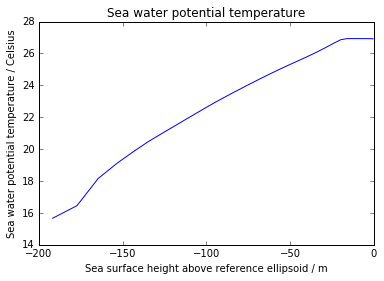

In [6]:
%matplotlib inline

import iris.quickplot as qplt

l, = qplt.plot(t_profile)

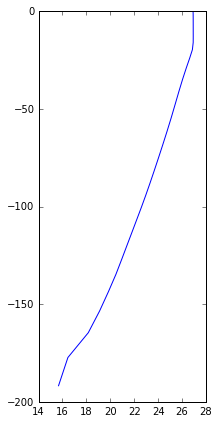

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3, 7))

t = t_profile.data
z = t_profile.coord('sea_surface_height_above_reference_ellipsoid').points
    
l, = ax.plot(t, z)

\* Most people miss the concept of a "dataset" when using `iris`, but that is a consequence of the CF model since there are no unique names to the variables and the same dataset might contain phenomena with different coordinates.

Aside: note that the [xarray](http://xarray.pydata.org/en/stable/) **does** have a dataset concept, but it infringes the CF model in many places to do so.



For more on iris see: https://ocefpaf.github.io/python4oceanographers/blog/2014/12/29/iris_ocean_models/

# UGRID-1.0 (pyugrid)

http://ugrid-conventions.github.io/ugrid-conventions/

In [8]:
import pyugrid

url = 'http://crow.marine.usf.edu:8080/thredds/dodsC/FVCOM-Nowcast-Agg.nc'

ugrid = pyugrid.UGrid.from_ncfile(url)

In a nutshell the `pyugrid` loads the data into a `ugrid` object that parsing and exposing the underlying grid topology.

In [9]:
lon = ugrid.nodes[:, 0]
lat = ugrid.nodes[:, 1]
triangles = ugrid.faces[:]

Sometimes the topology is incomplete but, if the data is UGRID compliant, `pyugrid` can derive the rest for you.

In [10]:
ugrid.build_edges()

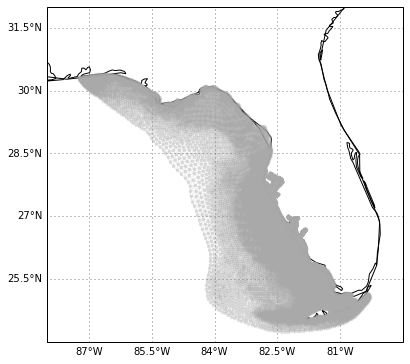

In [11]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(8, 6),
                           subplot_kw=dict(projection=projection))
    ax.coastlines(resolution='50m')
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

fig, ax = make_map()

kw = dict(marker='.', linestyle='-', alpha=0.25, color='darkgray')
ax.triplot(lon, lat, triangles, **kw)
ax.coastlines()
ax.set_extent([-88, -79.5, 24, 32])

There is some effort to integrate `pyugrid` into `iris` to augment the cube object to be both CF and UGRID aware by adding convenience plotting and slicing methods with pyugrid. You can see the full pyugrid example [here](https://ocefpaf.github.io/python4oceanographers/blog/2015/07/20/pyugrid/).

# SGRID-0.3 (pysgrid)


http://sgrid.github.io/sgrid/

In [12]:
import pysgrid

url = ('http://geoport.whoi.edu/thredds/dodsC/clay/usgs/users/'
       'jcwarner/Projects/Sandy/triple_nest/00_dir_NYB05.ncml')


sgrid = pysgrid.from_ncfile(url)

The `pysgrid` module is similar to `pyugrid`. The grid topology is parsed into a Python object with methods and attributes that translate the SGRID conventions.

In [13]:
sgrid.edge1_coordinates, sgrid.edge1_dimensions, sgrid.edge1_padding

((u'lon_u', u'lat_u'),
 u'xi_u: xi_psi eta_u: eta_psi (padding: both)',
 [GridPadding(mesh_topology_var=u'grid', face_dim=u'eta_u', node_dim=u'eta_psi', padding=u'both')])

In [14]:
u_var = sgrid.u

u_var.center_axis, u_var.node_axis

(1, 0)

In [15]:
v_var = sgrid.v
v_var.center_axis, v_var.node_axis

(0, 1)

In [16]:
u_var.center_slicing, v_var.center_slicing

((slice(None, None, None),
  slice(None, None, None),
  slice(1, -1, None),
  slice(None, None, None)),
 (slice(None, None, None),
  slice(None, None, None),
  slice(None, None, None),
  slice(1, -1, None)))

The API is "raw" but comprehensive. There is plenty of room to create convinience methods using the low level access provided by the library.

See below an example of the API and some convenience methods to `slice`, `pad`, `average`, and `rotate` the structure grid.

(Ideally all that could be done in the background in a high level object like the iris cube.)

In [17]:
# Center slice.

from netCDF4 import Dataset

nc = Dataset(url)
u_velocity = nc.variables[u_var.variable]
v_velocity = nc.variables[v_var.variable]

v_idx = 0  # Bottom.
time_idx = -1  # Last time step.

u_data = u_velocity[time_idx, v_idx, u_var.center_slicing[-2], u_var.center_slicing[-1]]
v_data = v_velocity[time_idx, v_idx, v_var.center_slicing[-2], v_var.center_slicing[-1]]


# Average at the center.
from pysgrid.processing_2d import avg_to_cell_center

u_avg = avg_to_cell_center(u_data, u_var.center_axis)
v_avg = avg_to_cell_center(v_data, v_var.center_axis)

# Rotate the grid*.
from pysgrid.processing_2d import rotate_vectors

angles = nc.variables[sgrid.angle.variable][sgrid.angle.center_slicing]
u_rot, v_rot = rotate_vectors(u_avg, v_avg, angles)

# Compute the speed.
from pysgrid.processing_2d import vector_sum

uv_vector_sum = vector_sum(u_rot, v_rot)

/home/filipe/miniconda/envs/notebooks_demos/lib/python2.7/site-packages/pysgrid/processing_2d.py:22: RuntimeWarning: invalid value encountered in sqrt
  vector_sum = np.sqrt(x_arr**2 + y_arr**2)


All this could be hidden from an end user when plotting.

In [18]:
grid_cell_centers = sgrid.centers

lon_var_name, lat_var_name = sgrid.face_coordinates

sg_lon = getattr(sgrid, lon_var_name)
sg_lat = getattr(sgrid, lat_var_name)

lon_data = grid_cell_centers[..., 0][sg_lon.center_slicing]
lat_data = grid_cell_centers[..., 1][sg_lat.center_slicing]

In [19]:
import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


def make_map(projection=ccrs.PlateCarree(), figsize=(9, 9)):
    fig, ax = plt.subplots(figsize=figsize,
                           subplot_kw=dict(projection=projection))
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

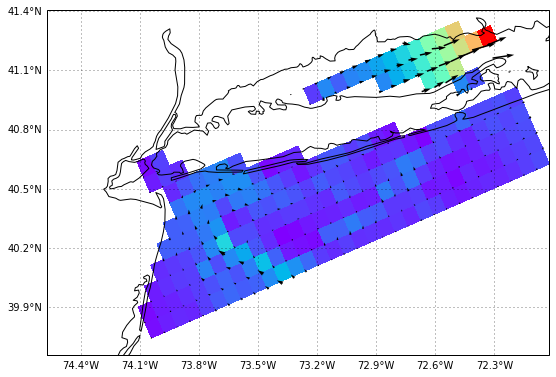

In [20]:
sub = 10
scale = 0.06

fig, ax = make_map()

kw = dict(scale=1.0/scale, pivot='middle', width=0.003, color='black')
q = plt.quiver(lon_data[::sub, ::sub], lat_data[::sub, ::sub],
               u_rot[::sub, ::sub], v_rot[::sub, ::sub], zorder=2, **kw)

cs = plt.pcolormesh(lon_data[::sub, ::sub],
                    lat_data[::sub, ::sub],
                    uv_vector_sum[::sub, ::sub], zorder=1, cmap=plt.cm.rainbow)

_ = ax.coastlines('10m')

\* CF convention do describe the angle variable for grids that needs rotation,
but there is no action expected like in the `formula_terms`.
`pysgrid` must be improved to abstract that action when needed via a simpler method.

```xml
<entry id="angle_of_rotation_from_east_to_x">
    <canonical_units>degree</canonical_units>
    <grib></grib>
    <amip></amip>
    <description>The quantity with standard name angle_of_rotation_from_east_to_x is the angle, anticlockwise reckoned positive, between due East and (dr/di)jk, where r(i,j,k) is the vector 3D position of the point with coordinate indices (i,j,k).  It could be used for rotating vector fields between model space and latitude-longitude space.</description>
</entry>
```

For more examples using pysgrid see this [post]((https://ocefpaf.github.io/python4oceanographers/blog/2015/12/07/pysgrid/). See also [this](https://gist.github.com/ocefpaf/62940cbe5c7674a6f3e9) trick to plot the vectors at the center of the cells.